# Problem Description:

In this notebook, we apply the concept of a Feedforward Neural Network in order to classify images from the MNIST dataset. The dataset is also available in the TensorFlow API, so we make use of it to load the data. Here, we also implement image classification with multiple classes, turning the classification into a multiclass problem. 

Images are represented as a matrix of 3 dimension (H x W x C), but since we are working with black and white images, the channels only contains two colors.

The notebook is organized as follows:

1. Imports
2. Dataset
3. Model
4. Evaluation

### Imports

In [16]:
import warnings
warnings.filterwarnings("ignore") 

In [17]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [18]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

### Dataset

In [20]:
# We are working with the MNIST dataset. The data contains images of handwritten digits in black and white colors
# Images are commonly represented as a matrix of 3 dimensions (channels, width and heigh). For black and white images, we only need one channel
# Since the data only contains two colors (black and white), the tensors will be shaped 1 x 28 x28

mnist = tf.keras.datasets.mnist

In [21]:
# The load_data() function returns two tuples, where the first contains the train set and the second contains the test set
# Next we normalize the sets by dividing them by 255. Since the original values are between 0 and 255, this will scale the data to be between 0 and 1

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(f"Train Shape: {x_train.shape}")

Train Shape: (60000, 28, 28)


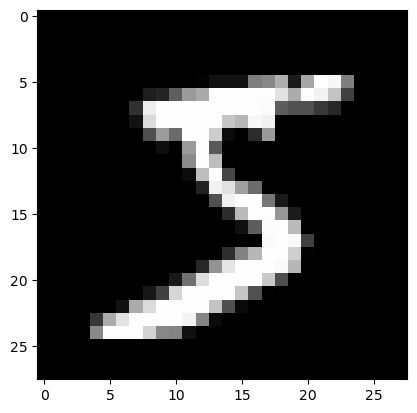

In [22]:
# Ploting the first image of the train set

plt.imshow(x_train[0], cmap='gray');

### Model

Here, we also apply the Dropout as a form of regularization. The term “dropout” refers to dropping out the nodes (input and hidden layer) in a neural network. 

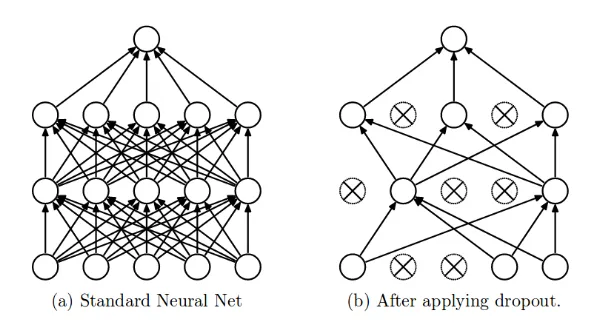

Another important aspect is the use of the ReLU as the activation function, which differs from the sigmoid function. It is a good practice use the ReLU in the hidden nodes. As for the output layer, we use the Softmax function, since we are dealing with a multiclass problem. 

The ReLU can be represented as:

\begin{equation}
    f(x) = \max(0, x)
\end{equation}

While the Softmax can be represented as follows:

\begin{equation}
    p(y = k | x) = \frac{\exp^{{(a_{k})}}}{\sum_{j = 1}^{K} \exp^{{(a_{j})}}}
\end{equation}

In [23]:
# Build Model
# The Flatten Layer converts the data from N x 28 x 28 to N x 784 (which is a two dimensional array)
# The Dense Layer performs a linear transformation with 128 neurons
# The Dropout Layer inserts some level of regularization by randomly dropping nodes with a 20% probability rate. This prevents overfitting
# Finally, the last Dense Layer will be responsible for providing the output, that is, the class (here, we have 10 classes)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = "softmax")
])

Here, since we are dealing with a multiclass problem, we optimize the Sparse Categorical Cross Entropy, which has the same intuition of the Cross Entropy, but deals with multiple classses.

In [24]:
# Compile the Model

model.compile(optimizer = "adam", 
              loss = "sparse_categorical_crossentropy", 
              metrics = ["accuracy"])

In [25]:
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2940 - accuracy: 0.9154 - val_loss: 0.1399 - val_accuracy: 0.9586
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1446 - accuracy: 0.9570 - val_loss: 0.0970 - val_accuracy: 0.9713
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1056 - accuracy: 0.9678 - val_loss: 0.0883 - val_accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0884 - accuracy: 0.9733 - val_loss: 0.0794 - val_accuracy: 0.9758
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0749 - accuracy: 0.9765 - val_loss: 0.0758 - val_accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0652 - accuracy: 0.9795 - val_loss: 0.0703 - val_accuracy: 0.9790
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0600 - accuracy: 0.9802 - val_loss: 0.0675 - val_accuracy:

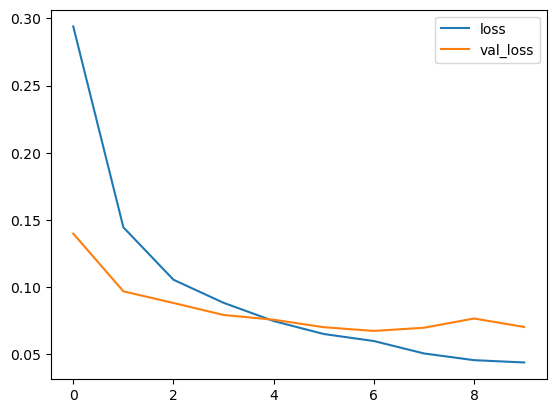

In [26]:
# Plot Loss per Iteration

plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend();

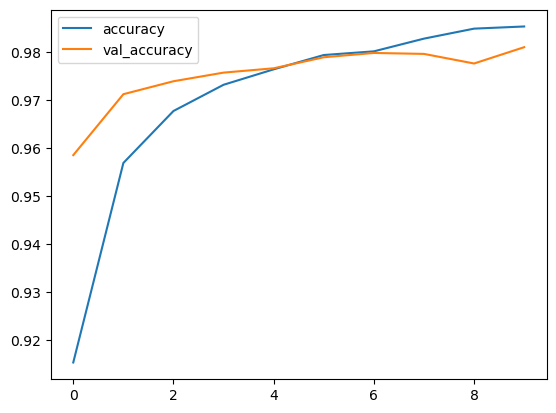

In [27]:
# Plot Accuracy per Iteration

plt.plot(r.history["accuracy"], label = "accuracy")
plt.plot(r.history["val_accuracy"], label = "val_accuracy")
plt.legend();

In [28]:
# Evaluate the Model

print(f"Train score: {model.evaluate(x_train, y_train)}")
print(f"Train score: {model.evaluate(x_test, y_test)}")

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0205 - accuracy: 0.9937
Train score: [0.020500358194112778, 0.9936666488647461]
313/313 [==============================] - 1s 2ms/step - loss: 0.0705 - accuracy: 0.9811
Train score: [0.07045144587755203, 0.9811000227928162]


### Evaluation

313/313 [==============================] - 1s 2ms/step


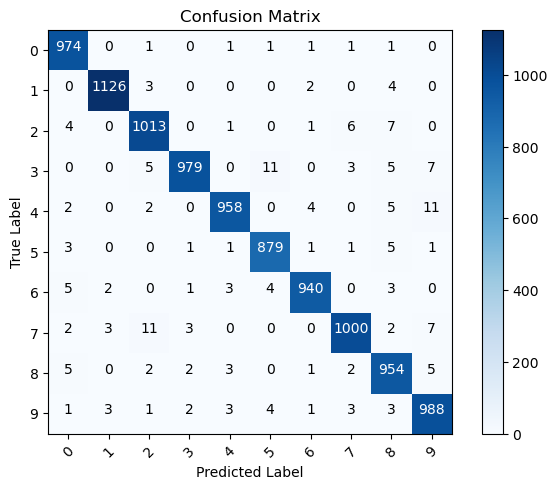

In [29]:
# Plot Confusion Matrix

pred = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, pred)

plt.imshow(cm, interpolation = "nearest", cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(range(10)))
plt.xticks(tick_marks, list(range(10)), rotation = 45)
plt.yticks(tick_marks, list(range(10)))


thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j]),
            horizontalalignment = "center", 
            color = "white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

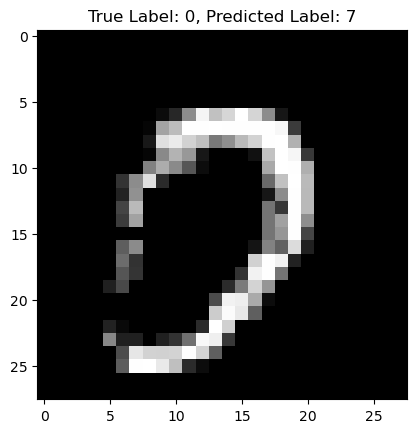

In [30]:
# It seems that the number 5 is being confused with a 3, the number 7 is being confused with the number 2, and the number 9 with 4
# We can plot some of the misclassified examples to see where the model is making wrong predictions

misclassified_idx = np.where(pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = "gray")
plt.title(f"True Label: {y_test[i]}, Predicted Label: {pred[i]}");